In [1]:
# Upload the Housing.csv file from your computer
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Housing.csv")  # Load the dataset
df.head()                        # Show first 5 rows


,price,area,bedrooms,bathrooms,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()         # Data types and nulls
df.shape          # Rows & columns
df.describe()     # Summary statistics
df.columns        # List of column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   hotwaterheating   545 non-null    object
 7   airconditioning   545 non-null    object
 8   parking           545 non-null    int64 
 9   prefarea          545 non-null    object
 10  furnishingstatus  545 non-null    object
dtypes: int64(5), object(6)
memory usage: 47.0+ KB


Index(['price', 'area', 'bedrooms', 'bathrooms', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [5]:
# Check for missing values
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0
prefarea,0


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,price,area,bedrooms,bathrooms,parking,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,2,False,False,False,True,True,False,False
1,12250000,8960,4,4,3,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,False,True,False,False,True,True,False
3,12215000,7500,4,2,3,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,True,True,False,True,False,False,False


In [7]:
X = df_encoded.drop('price', axis=1)  # Input features
y = df_encoded['price']              # Target variable


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.6013834372763719
Mean Squared Error: 2014835417649.039


In [16]:
sample = X_test.iloc[[0]]   # double brackets keep it as DataFrame
predicted_price = model.predict(sample)

print("Predicted Price:", predicted_price[0])



Predicted Price: 5329182.913962968


In [17]:
import joblib
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [13]:
model_loaded = joblib.load('house_price_model.pkl')


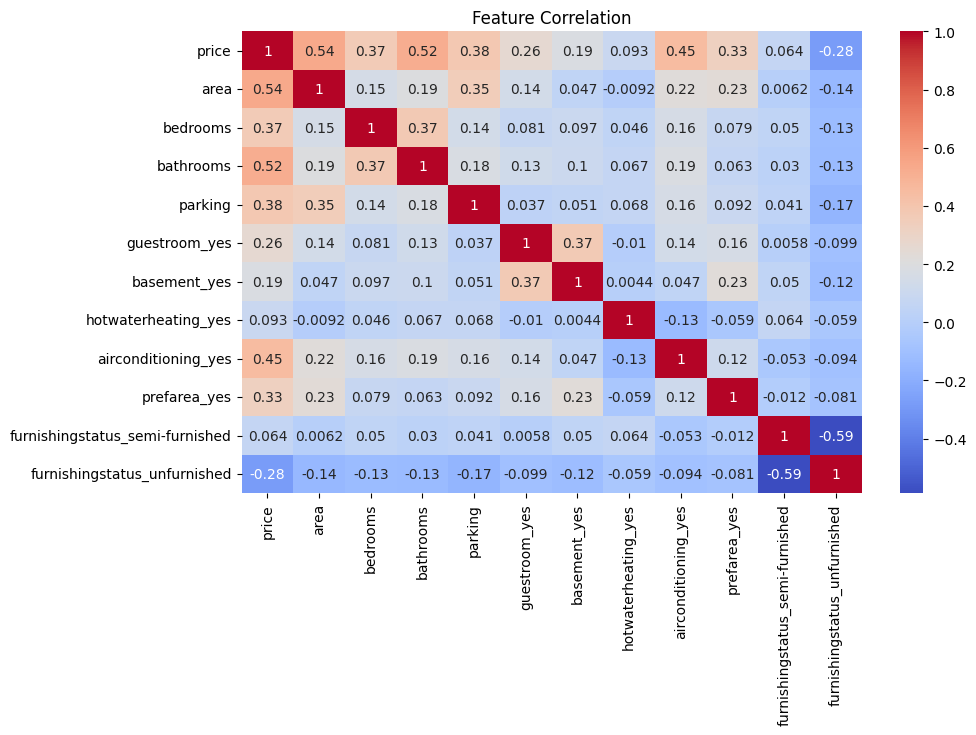

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()
